In [21]:

import os

import matplotlib.pyplot as plt

from Bio import Phylo, AlignIO
from Bio.Seq import Seq

from Bio.SeqRecord import SeqRecord

from Bio.Align import MultipleSeqAlignment
from Bio.AlignIO.PhylipIO import PhylipWriter


In [26]:
threshold = -5.0

input_dir = "../data/language_alignments/"
alignment_file = "Indo-European_WALS_BinaryOutgroup_March21_stability.ONLYFIN_common_grammatical"
#alignment_file = "IE2011_RelaxedCovarion_AllSingletonsGeo"
prefix = '../output/raxml/MORPHOLOGICAL/'
#prefix = '../output/raxml/COGNATE/'

In [27]:
os.system('./../raxml-ng/build/bin/raxml-ng --sitelh --msa ' + input_dir + alignment_file +'.phy --threads 2 --model BIN --tree ../output/geo.tree --prefix '+ prefix + '/geo_per_site_')


ERROR: Result files for the run with prefix `../output/raxml/MORPHOLOGICAL//geo_per_site_` already exist!
Please either choose a new prefix, remove old files, or add --redo command line switch to overwrite them.



256

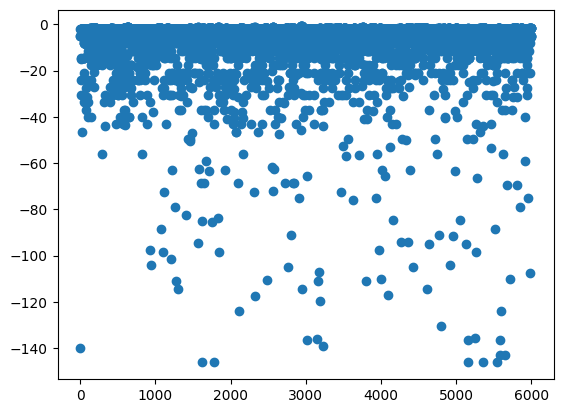

In [28]:
with open(prefix + '/geo_per_site_.raxml.siteLH', 'r') as file:
    data = (file.read().replace('\n', '')).split(" ")
    


per_site_likelihoods = [float(data[i]) for i in range(5, len(data))]

plt.scatter([i for i in range(len(per_site_likelihoods))], per_site_likelihoods)
plt.show()

In [29]:
align = AlignIO.read(input_dir + alignment_file + "_fixed.phy",'phylip')
filtered_align = None

records = []
for i in range(0, align.get_alignment_length()):
    
    if(per_site_likelihoods[i] < threshold):
        if filtered_align is None:
            filtered_align = align[:, i:i+1]
        else:
            filtered_align = filtered_align + align[:, i:i+1]
print(filtered_align)
with open(input_dir + alignment_file + "_filtered_" + str(threshold) + ".phy","w+") as f:
    writer = PhylipWriter(f)
    writer.write_alignment(filtered_align)

Alignment with 46 rows and 208 columns
00000000100100010000100100010100000000000000...000 It
00000001000100010000100100010100000000000000...000 Sp
00000010000100000000100100010100000000000000...001 Cat
00000000100100010000100100010100000000000000...011 Fr
00000000100100010000100100010100000000000000...000 Ptg-E
00000001000100010000000100010100000000100000...000 Rm
???00010000100000000000100010100000000001000...000 Lat
???00010000010010000000100010100000000010000...000 ClG
00000001000010000000000100010100000000000000...000 Grk
???00010000100000??0000100010100000000010000...??0 Got
???00010000100000??0000100010100000000010000...??0 OE
00000000100100010000000100100100000000000000...000 E
00000010000100000000000100010100000000000000...000 Ger
00000000100100010000100100100100000000100000...000 Da
00000010000100000000000100010100000000110000...000 Ice
00000000100100010000100100010100000000100000...000 Swe
00000010000100000000000100010100000000100000...000 Far
00000000100100010000000100010100